In [1]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import sys
from SiPANN import SiP

INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/GAP_SWEEP_REALS/model
INFO:tensorflow:Restoring parameters from /Users/alechammond/Documents/GitHub/SiP-ANN/SiPANN/ANN/STRAIGHT_SWEEP_REALS/model


<IPython.core.display.Javascript object>


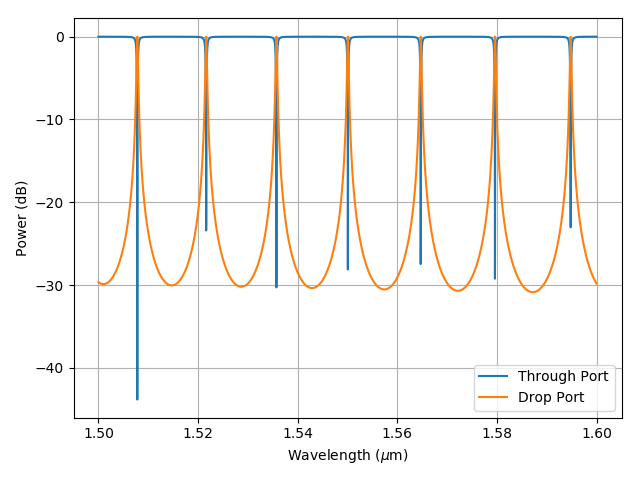

In [2]:
# Set up input parameters
wavelength    = np.squeeze(np.linspace(1.5,1.6,5000))
radius        = 12
couplerLength = 2
sideLength    = 5
gap           = 0.2
width         = 0.5
thickness     = 0.2

# Calculate the scattering matrix
S = SiP.racetrackRR(wavelength,radius=radius,couplerLength=couplerLength,gap=0.2,width=0.5,thickness=0.2)

# Evaluate response
input       = np.squeeze([1,0,0,0])
output      = np.matmul(S,input)
throughPort = np.abs(np.squeeze(output[:,1])) ** 2
dropPort    = np.abs(np.squeeze(output[:,3])) ** 2

# Visualize
plt.figure()
plt.plot(wavelength,10*np.log10(throughPort),label='Through Port')
plt.plot(wavelength,10*np.log10(dropPort),label='Drop Port')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Power (dB)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()